In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
#pip install matplotlib

In [3]:
df=pd.read_csv(r"C:\Users\user\Desktop\car class price prediction\carprice\cars_price.csv")

In [4]:
df.shape

(205, 26)

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
#check for errors or currupt values
for i in range(26):
    print(df.iloc[:,i].value_counts())

symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64
normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
j

In [7]:
df.loc[df["normalized-losses"]=="?",:] #too many corrupt values"?" ,so it is best to delete the column
df=df.drop(columns="normalized-losses")

In [8]:
df=df.dropna() #drop null values

In [9]:
df.shape

(205, 25)

In [10]:
df=df.drop_duplicates() #drop duplicates if any

In [11]:
#fuel-type column
df['fuel-type'].value_counts()  #binary categorical data 

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

In [12]:
df['fuel-type']=df['fuel-type'].map({"gas":1,"diesel":0}) # label encoding

In [13]:
df['fuel-type']=df['fuel-type'].astype('int64') #object to int conversion

In [14]:
#aspiration
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [15]:
df['aspiration']=df['aspiration'].map({'std':1,'turbo':0})

In [16]:
df['aspiration']=df['aspiration'].astype('int64')

In [17]:
#num-of-doors
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
?         2
Name: count, dtype: int64

In [18]:
df=df.loc[df['num-of-doors']!='?']

In [19]:
df.shape

(203, 25)

In [20]:
df['num-of-doors']=df['num-of-doors'].map({'four':1,'two':0})

In [21]:
df['num-of-doors']=df['num-of-doors'].astype('int64')

In [22]:
#body-style
df=df.drop(columns='body-style')

In [23]:
#engine location
df['engine-location'].value_counts()

engine-location
front    200
rear       3
Name: count, dtype: int64

In [24]:
df['engine-location']=df['engine-location'].map({'front':1,'rear':0})

In [25]:
#no of cylinders
df=df.loc[df['bore']!='?']

In [26]:
df['bore']=df['bore'].astype('float64')

In [27]:
#stroke
df.stroke.value_counts()
df.stroke[0]
df.stroke=df.stroke.astype('float64')

In [28]:
#horse power
df.horsepower[0] #data being read as string intead of int

'111'

In [29]:
df=df.loc[df.horsepower!='?',:]

In [30]:
df.horsepower=df.horsepower.astype('int64') #object to int conversion

In [31]:
#peak-rpm
df['peak-rpm'][0]

'5000'

In [32]:
df['peak-rpm']=df['peak-rpm'].astype('int64')

In [33]:
#price 
df.price[0]

'13495'

In [34]:
df=df.loc[df.price!='?',:]

In [35]:
df.price=df.price.astype('int64')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    int64  
 3   aspiration         193 non-null    int64  
 4   num-of-doors       193 non-null    int64  
 5   drive-wheels       193 non-null    object 
 6   engine-location    193 non-null    int64  
 7   wheel-base         193 non-null    float64
 8   length             193 non-null    float64
 9   width              193 non-null    float64
 10  height             193 non-null    float64
 11  curb-weight        193 non-null    int64  
 12  engine-type        193 non-null    object 
 13  num-of-cylinders   193 non-null    object 
 14  engine-size        193 non-null    int64  
 15  fuel-system        193 non-null    object 
 16  bore               193 non-null

In [37]:
print(df['drive-wheels'].value_counts())
print(df['make'].value_counts())
print(df['engine-type'].value_counts())
print(df['num-of-cylinders'].value_counts())
print(df['fuel-system'].value_counts())

drive-wheels
fwd    114
rwd     71
4wd      8
Name: count, dtype: int64
make
toyota           32
nissan           18
honda            13
mitsubishi       13
volkswagen       12
subaru           12
mazda            12
volvo            11
peugot           11
bmw               8
dodge             8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: count, dtype: int64
engine-type
ohc     141
ohcf     15
ohcv     13
dohc     12
l        12
Name: count, dtype: int64
num-of-cylinders
four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: count, dtype: int64
fuel-system
mpfi    88
2bbl    64
idi     19
1bbl    11
spdi     9
mfi      1
spfi     1
Name: count, dtype: int64


In [38]:
df=df.drop(columns='make') #Here encoding of column 'make' leads to more number of fetures which intern leads to complexity of mode

In [39]:
#Encoding 
OHE_data = pd.get_dummies(df, columns = ['drive-wheels', 'engine-type','num-of-cylinders','fuel-system'])

In [40]:
#reset indexes so avoid column index in dataframe
final_data=OHE_data.reset_index(drop=True)

In [41]:
final_data

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,...,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
1,3,1,1,0,1,88.6,168.8,64.1,48.8,2548,...,False,False,False,False,False,False,False,True,False,False
2,1,1,1,0,1,94.5,171.2,65.5,52.4,2823,...,True,False,False,False,False,False,False,True,False,False
3,2,1,1,1,1,99.8,176.6,66.2,54.3,2337,...,False,False,False,False,False,False,False,True,False,False
4,2,1,1,1,1,99.4,176.6,66.4,54.3,2824,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,1,1,1,1,109.1,188.8,68.9,55.5,2952,...,False,False,False,False,False,False,False,True,False,False
189,-1,1,0,1,1,109.1,188.8,68.8,55.5,3049,...,False,False,False,False,False,False,False,True,False,False
190,-1,1,1,1,1,109.1,188.8,68.9,55.5,3012,...,True,False,False,False,False,False,False,True,False,False
191,-1,0,0,1,1,109.1,188.8,68.9,55.5,3217,...,True,False,False,False,False,True,False,False,False,False


In [42]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                193 non-null    int64  
 1   fuel-type                193 non-null    int64  
 2   aspiration               193 non-null    int64  
 3   num-of-doors             193 non-null    int64  
 4   engine-location          193 non-null    int64  
 5   wheel-base               193 non-null    float64
 6   length                   193 non-null    float64
 7   width                    193 non-null    float64
 8   height                   193 non-null    float64
 9   curb-weight              193 non-null    int64  
 10  engine-size              193 non-null    int64  
 11  bore                     193 non-null    float64
 12  stroke                   193 non-null    float64
 13  compression-ratio        193 non-null    float64
 14  horsepower               1

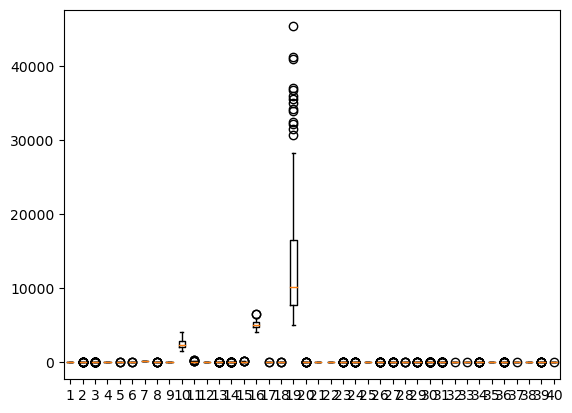

In [43]:
plt.boxplot(final_data) #outlier is present 
plt.show()

In [44]:
final_data.describe()

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,0.901554,0.818653,0.580311,0.984456,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,3.330622,3.248860,10.143627,103.481865,5099.740933,25.326425,30.787565,13285.025907
std,1.235582,0.298691,0.386308,0.494792,0.124025,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,0.272385,0.315421,3.977491,37.960107,468.694369,6.387828,6.816910,8089.082886
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7738.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16515.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [45]:
#from above data we can see there is outlier present ,for given business problem we do not need to remove outlier
#so scaling is needed

In [46]:
final_data.iloc[:,0:19].corr()

,symboling,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.185730,0.042855,-0.659122,-0.224529,-0.536516,-0.363194,-0.247741,-0.517803,-0.231086,-0.068327,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
fuel-type,0.185730,1.000000,0.431268,-0.175294,-0.041523,-0.310196,-0.209882,-0.245662,-0.274296,-0.227255,-0.066091,-0.052378,-0.253837,-0.984951,0.156712,0.477885,-0.242396,-0.174032,-0.115440
aspiration,0.042855,0.431268,1.000000,-0.046026,-0.059141,-0.263988,-0.249014,-0.323643,-0.093185,-0.331855,-0.109131,-0.247400,-0.232950,-0.332095,-0.255771,0.193908,0.205628,0.256251,-0.186073
num-of-doors,-0.659122,-0.175294,-0.046026,1.000000,0.147758,0.447460,0.400636,0.235345,0.523799,0.209849,-0.003019,0.127156,-0.008421,0.161471,-0.097046,-0.200355,-0.068485,-0.082160,0.046460
engine-location,-0.224529,-0.041523,-0.059141,0.147758,1.000000,0.192972,0.054785,0.052672,0.119416,-0.050029,-0.199546,-0.189345,0.139339,0.020386,-0.343559,-0.215106,0.164217,0.106960,-0.330848
wheel-base,-0.536516,-0.310196,-0.263988,0.447460,0.192972,1.000000,0.879307,0.818465,0.591239,0.782173,0.568375,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951
length,-0.363194,-0.209882,-0.249014,0.400636,0.054785,0.879307,1.000000,0.857368,0.491050,0.882694,0.686998,0.606373,0.121888,0.156061,0.589650,-0.276144,-0.702143,-0.731264,0.695928
width,-0.247741,-0.245662,-0.323643,0.235345,0.052672,0.818465,0.857368,1.000000,0.310640,0.867640,0.739903,0.541633,0.188733,0.188631,0.621532,-0.247612,-0.657153,-0.702009,0.754649
height,-0.517803,-0.274296,-0.093185,0.523799,0.119416,0.591239,0.491050,0.310640,1.000000,0.305837,0.026906,0.182445,-0.054338,0.253934,-0.081730,-0.257334,-0.111166,-0.159850,0.136234
curb-weight,-0.231086,-0.227255,-0.331855,0.209849,-0.050029,0.782173,0.882694,0.867640,0.305837,1.000000,0.857188,0.645070,0.175349,0.161030,0.762154,-0.278528,-0.777763,-0.818104,0.835368


Text(0, 0.5, 'price')

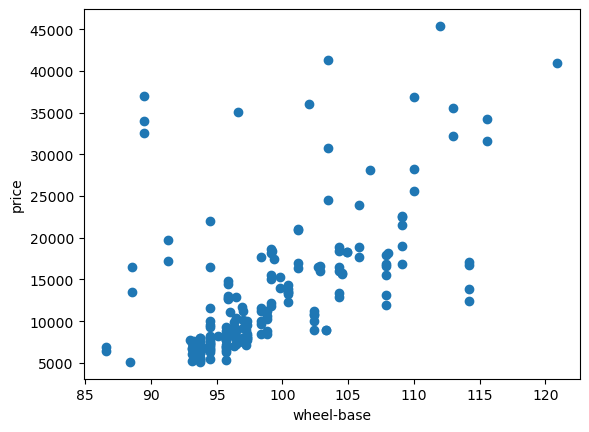

In [47]:
plt.scatter(final_data['wheel-base'],final_data['price'])
plt.xlabel("wheel-base")
plt.ylabel("price")

In [48]:
sns_data=final_data[['wheel-base','length','curb-weight','engine-size','bore','horsepower','price']]

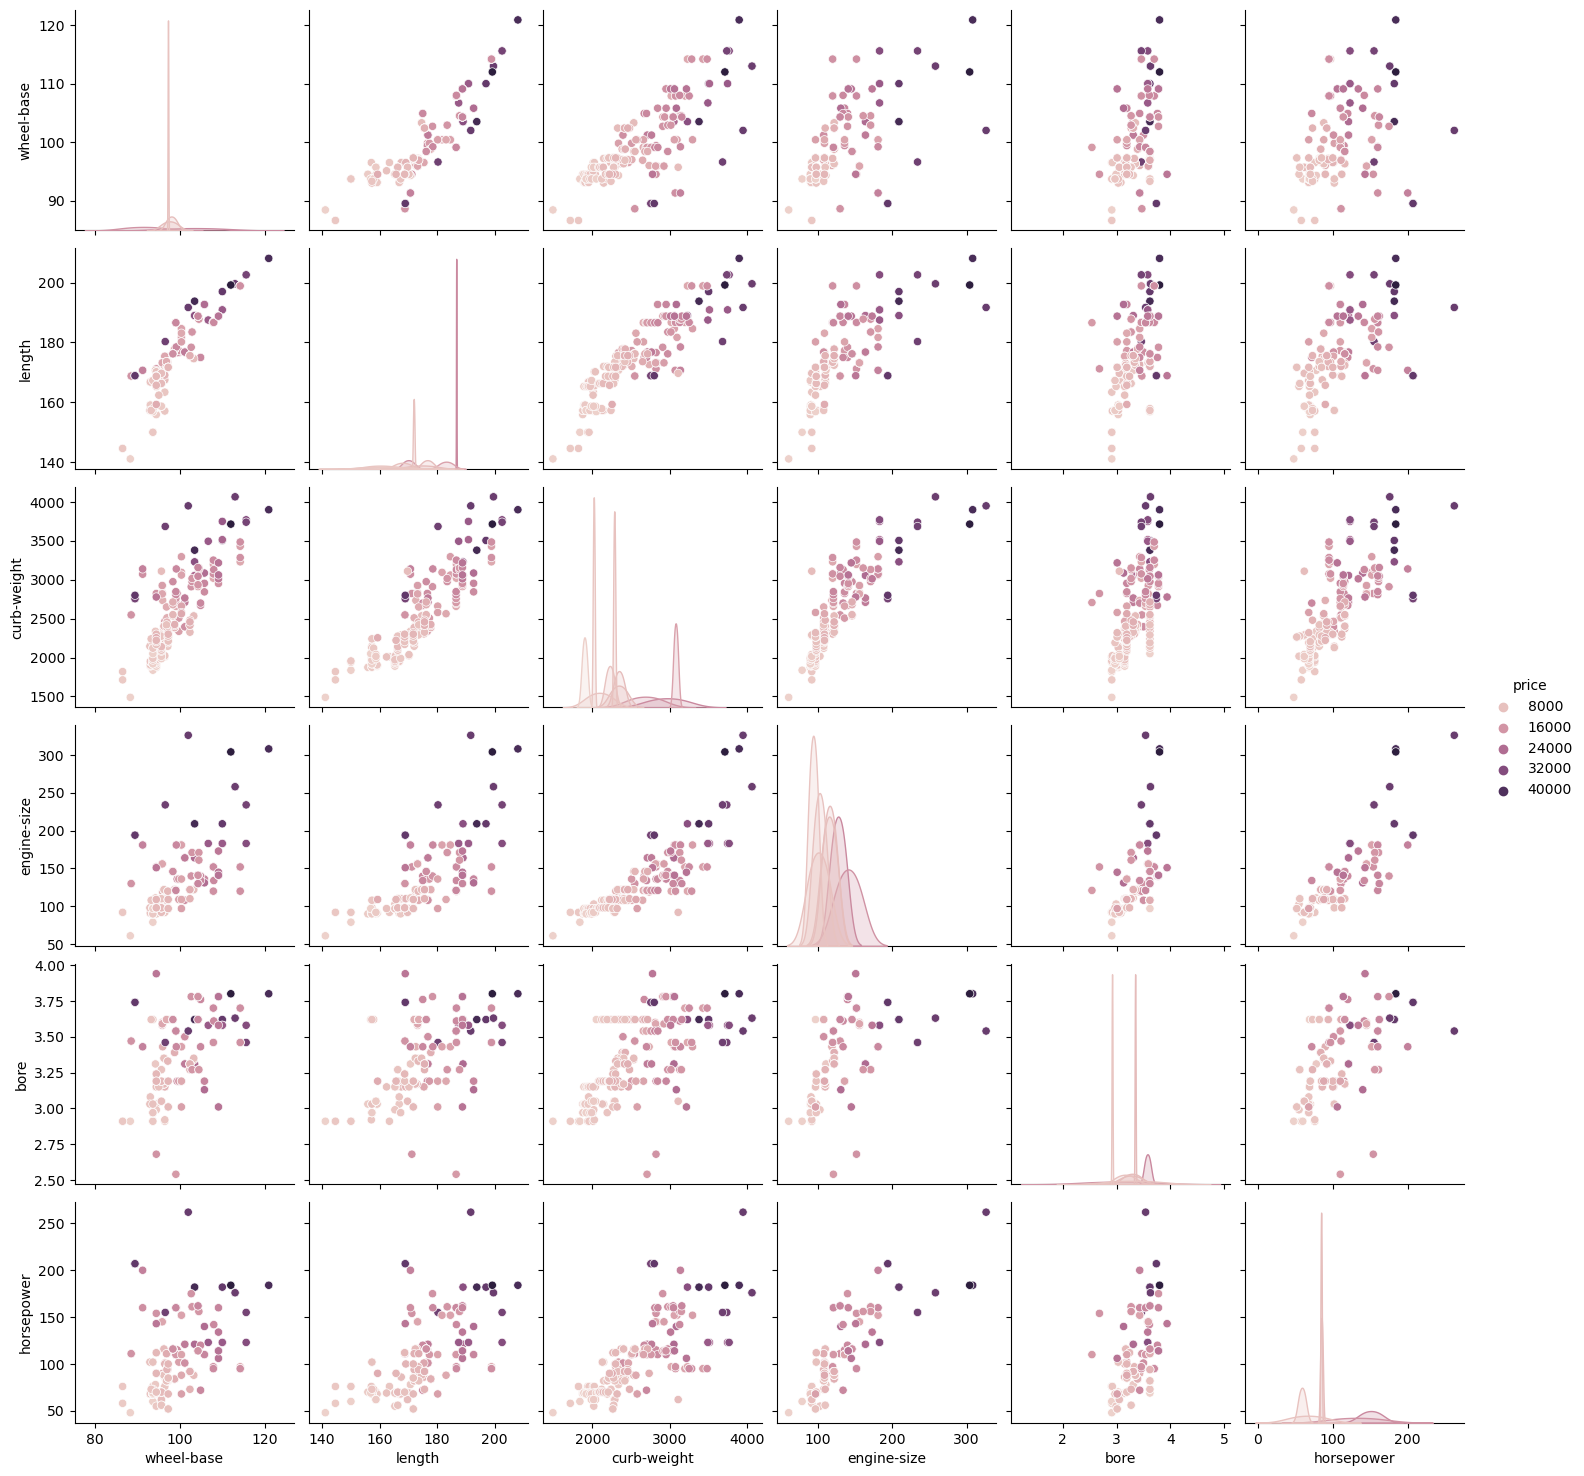

In [49]:
sns.pairplot(data=sns_data, hue="price")

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X=final_data.drop(columns='price')
y=final_data.price

In [52]:
print(X.shape)
print(y.shape)

(193, 39)
(193,)


In [53]:
#split the data as train and test
#Assign 20% data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#data points are scaled so that all data can have same range,
#using formula=>(x_new=x_old-mean(x)/std(x))
X_test=sc.transform(X_test)

In [56]:
X_test.shape

(39, 39)

In [57]:
X_train.shape

(154, 39)

In [58]:
#linear Regressor
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred=LR.predict(X_test)

In [60]:
r2_score(y_test,y_pred)

0.9092553181847418

In [61]:
#lasso regression
from sklearn.linear_model import Lasso
lasso= Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso=lasso.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.880e+06, tolerance: 1.030e+06
  model = cd_fast.enet_coordinate_descent(


In [62]:
r2_score(y_test,y_pred_lasso)

0.9096795954363939

In [63]:
#Ridge regresson
from sklearn.linear_model import Ridge
ridge= Ridge()
ridge.fit(X_train,y_train)
y_pred_rig=ridge.predict(X_test)

In [64]:
r2_score(y_test,y_pred_rig)

0.907561572815111

In [65]:
#Gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(random_state=0) 
gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=0)

In [66]:
y_pred_gbr=gbr.predict(X_test)
r2_score(y_test,y_pred_gbr)

0.9506375172529775

In [67]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [68]:
y_pred_rf= regr.predict(X_test) 
r2_score(y_test,y_pred_rf)
#with bydefault parameters Random forest regressor has given highest r2_score,
#so lets continue with it and tune the hyperparameters

0.9566458202036812

In [69]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = [ 'sqrt'] # number of features in consideration at every split
max_depth = [2,4,6,8,10,12] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf}

In [70]:
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=random_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestRegressor(max_depth=12, max_features='sqrt')


In [71]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0,bootstrap=False, max_depth=6, max_features='sqrt',min_samples_split=6, n_estimators=20)
regr.fit(X_train, y_train)

y_pred_rf= regr.predict(X_test) 
r2_score(y_test,y_pred_rf) 

0.9540695770522626

In [72]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred_rf= regr.predict(X_test) 
r2_score(y_test,y_pred_rf)

0.9566458202036812

In [73]:
print('mae',mean_absolute_error(y_test,y_pred_rf))
print('mse',mean_squared_error(y_test,y_pred_rf))
print('r2',r2_score(y_test,y_pred_rf))

mae 1282.8706196581195
mse 2495234.4749590284
r2 0.9566458202036812
